In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [62]:
dfx=pd.read_csv("./Documents/machine-learning-online-2018/Datasets/Locally Weighted Regression/weightedx.csv")

In [63]:
dfy=pd.read_csv("./Documents/machine-learning-online-2018/Datasets/Locally Weighted Regression/weightedy.csv")

In [64]:
X=dfx.values
Y=dfy.values


In [66]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


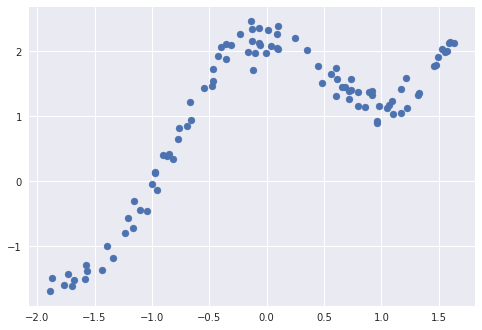

In [70]:
u=X.mean()
std=X.std()
X=(X-u)/std
plt.scatter(X,Y)
plt.style.use("seaborn")
plt.show()

# Find out w matrix


In [77]:
def getW(query_pt,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        xi= X[i]
        x=query_pt
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [78]:
X=np.mat(X)
M=X.shape[0]
Y=np.mat(Y)

W = getW(-1,X,1)
print(W.shape)
print(W)


(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


# Making predictions

In [89]:
def predict(X,Y,query_pt,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_pt,1])
    
    W=getW(qx,X_,tau)
    
    #theta = (X'WX)inv(X'WY)
    
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred

In [90]:
theta,pred= predict(X,Y,1,1)

In [91]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [92]:
print(pred)

[[1.59417694]]


# Visualise predictions,anaylse the effect of tau

In [93]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    
    for xq in X_test:
        theta,pred= predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test=np.array(Y_test)
    XO=np.array(X)
    YO=np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

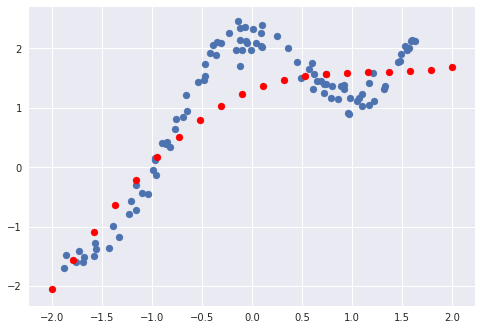

In [94]:
plotPrediction(1)

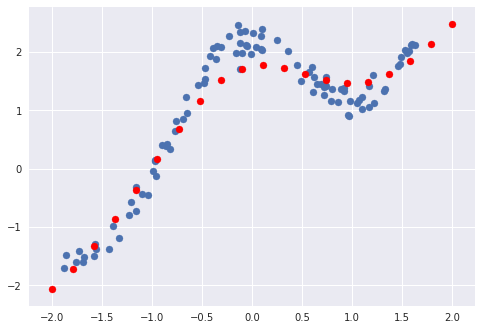

In [95]:
plotPrediction(0.5)

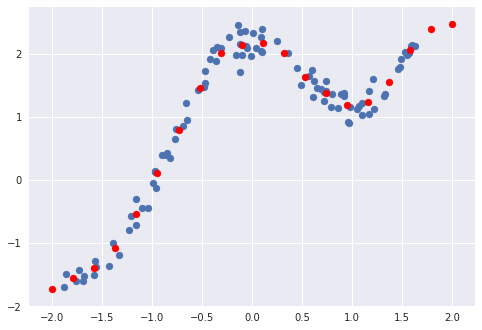

In [96]:
plotPrediction(0.1)